# 📊 Regressione Lineare con il Dataset delle Altezze

In questo notebook esploreremo un dataset contenente l'altezza dei padri (`fheight`) e dei figli (`sheight`), con l'obiettivo di costruire un modello di regressione lineare per prevedere l'altezza del figlio conoscendo quella del padre.

---

## Obiettivo

Guidarti passo dopo passo attraverso il ciclo di vita di un progetto di *Machine Learning supervisionato*, includendo:
- Esplorazione dei dati
- Preprocessing
- Addestramento del modello
- Valutazione
- Visualizzazione dei risultati


## 🔍 1. Esplorazione del dataset

### ✏️ Esercizio 1.1
Carica il dataset `pearson_dataset.csv` e stampa le prime 5 righe per esplorare la struttura dei dati.


In [2]:
# Qui faccio l'esercizio 1.1
import pandas as pd
print("Ecco le prima 5 righe -->\n")
dataf = pd.read_csv('pearson_dataset.csv')
print(dataf.head())
#print(dataf.to_string())  --- stampa tutto
print("\n Fine.")


Ecco le prima 5 righe -->

    fheight   sheight
0  65.04851  59.77827
1  63.25094  63.21404
2  64.95532  63.34242
3  65.75250  62.79238
4  61.13723  64.28113

 Fine.


In [ ]:
### ✏️ Esercizio 1.2
Calcola media, mediana e deviazione standard delle due colonne `fheight` e `sheight`.


In [3]:
# Qui esercizio 1.2
print("Ecco le medie -->\n")
print(dataf['fheight'].mean()) #media 1
print(dataf['sheight'].mean()) #media 2
print()
print("\nEcco le mediane -->\n")
print(dataf['fheight'].median()) #mediana 1
print("--------------------")
print(dataf['sheight'].median()) #mediana 2
print()
print("\nEcco le deviazioni standard -->\n")
print(dataf['fheight'].std()) #dev 1
print("--------------------")
print(dataf['sheight'].std()) #dev 2

Ecco le medie -->

67.68709686456401
68.68406965677178


Ecco le mediane -->

67.76660000000001
--------------------
68.61582


Ecco le deviazioni standard -->

2.7448684130425725
--------------------
2.814701592986971


### ✏️ Esercizio 1.3
Invoca la funzione per disegnare uno scatterplot con `fheight` sull'asse X e `sheight` sull'asse Y per visualizzare la relazione tra le due variabili.




Di seguito è riportata la relazione -->


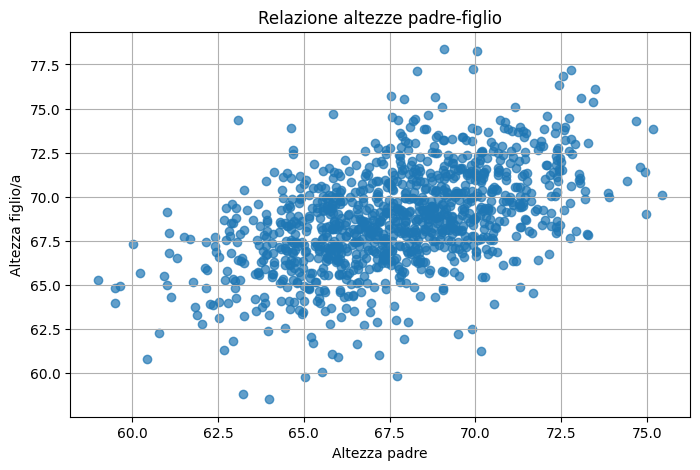

Correlazione:
          fheight   sheight
fheight  1.000000  0.501338
sheight  0.501338  1.000000


In [10]:

import matplotlib.pyplot as plt
import pandas as pd

def plot_scatter(df, x_col, y_col, x_label=None, y_label=None, title=None):
    """
    Crea uno scatter plot generico tra due colonne di un DataFrame.

    Parametri:
    - df: pandas DataFrame contenente i dati
    - x_col: nome della colonna da usare sull'asse X
    - y_col: nome della colonna da usare sull'asse Y
    - x_label: etichetta asse X (opzionale)
    - y_label: etichetta asse Y (opzionale)
    - title: titolo del grafico (opzionale)
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], alpha=0.7)
    plt.xlabel(x_label if x_label else x_col)
    plt.ylabel(y_label if y_label else y_col)
    plt.title(title if title else f"{y_col} vs {x_col}")
    plt.grid(True)
    plt.show()

print("Di seguito è riportata la relazione -->")

x_col="fheight"
y_col="sheight"
x_label="Altezza padre"
y_label="Altezza figlio/a"
title="Relazione altezze padre-figlio"

plot_scatter(dataf,x_col,y_col,x_label,y_label,title) #funzione generatrice grafico

print("Correlazione:")
print(dataf.corr())


## 🧹 2. Preprocessing dei dati

### ✏️ Esercizio 2.1
Verifica se ci sono valori nulli nel dataset.


Non sono presenti valori nulli nel dataset


<Axes: ylabel='Density'>

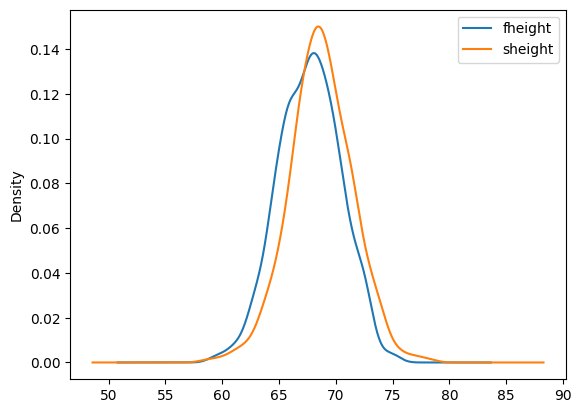

In [12]:
# Esercizio 2.1

#! isnull restituisce booleans, sum conta quanti null e any restituisce tre se almeno uno...

if (dataf["fheight"].isnull().any() or dataf["sheight"].isnull().any()):
    sbagliati=dataf.isnull().sum()
    print(f"Sono presenti valori nulli nel dataset e ce ne sono esattamente {sbagliati}")
else:
    print("Non sono presenti valori nulli nel dataset")
    
dataf.plot.kde()

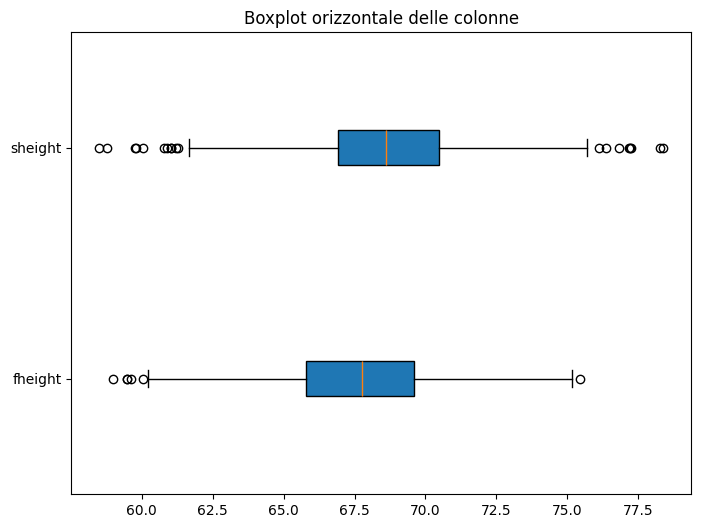

In [15]:
plt.figure(figsize=(8,6))
plt.boxplot(dataf.values,vert=False,patch_artist=True)

plt.yticks(range(1,len(dataf.columns)+1),dataf.columns)

plt.title("Boxplot orizzontale delle colonne")

plt.show()

#

### ✏️ Esercizio 2.2
Standardizza o normalizza i dati (opzionale) per sperimentare come cambiano i risultati.


In [ ]:
# Esercizio 2.2
from sklearn.preprocessing import MinMaxScaler

# Noralizzo i dati
scaler = MinMaxScaler()
scaler.fit(dataf)
print("min:", scaler.data_min_)
print("max:", scaler.data_max_)

#gauss
numpy_array = scaler.transform(dataf)
dataframe_scaled = pd.DataFrame(numpy_array, columns=dataf.columns)
dataframe_scaled.head()
dataframe_scaled.plot.kde()

#boxplot
plt.figure(figsize=(8,6))
plt.boxplot(dataframe_scaled.values, vert=False, patch_artist=True)
plt.yticks(range(1, len(dataframe_scaled.columns) + 1), dataframe_scaled.columns)
plt.title("Box Plot Orizzontale delle Colonne")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


## 🤖 3. Creazione del modello

### ✏️ Esercizio 3.1
Dividi il dataset in un training set (80%) e un test set (20%).


In [ ]:
# Esercizio 3.1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# 1 - carichiamo i dataset
# 2 - splittiamo dati di train e di test
# 3 - facciano il preprocessing
#  3a -> facciamo la fit sui dati di train
#  3b -> facciamo La transform sui dati di test e di train
# 4 - creiamo il modello di regressione Lineare
# 5 - fit(addestriamo il modello)
# 6 - facciamo la fase di test (calcolare L'mse sui dati di test)

# |
# |
# V


# 1 - Carichiamo il dataset
x = dataf.drop(columns=['sheight'])  #X -> solo la colonna dell'altezza dei padri
y = dataf['sheight']  # In y quella target

# 2 - Splittiamo dati di train e di test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

# 3 - Preprocessing
scaler = MinMaxScaler()
scaler.fit(x_train)

# 3b - Trasformiamo i dati di train e di test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# 4 - Creiamo il modello di regressione lineare
model = LinearRegression()

# 5 - saddestramento modello
model.fit(x_train, y_train)

# 6 - Fase di test: Calcolare l'MSE sui dati di test
print("Intercetta (q):", model.intercept_)
print("Coefficiente angolare (m):", model.coef_)

# Predizioni sui dati di test
y_pred = model.predict(x_test)

#ERRORE
# Calcoliamo l'errore quadratico medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

### ✏️ Esercizio 3.2
Allena un modello di regressione lineare usando i dati di training.


In [ ]:
#Es. 3.2
import numpy as np

def plot_regression_line(x, y, model):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Dati reali')
    predicted = model.predict(np.array(x).reshape(-1, 1))
    plt.plot(x, predicted, color='red', label='Retta di regressione')
    plt.xlabel("Altezza del padre (fheight)")
    plt.ylabel("Altezza del figlio (sheight)")
    plt.title("Regressione Lineare")
    plt.legend()
    plt.grid(True)
    plt.show()

### ✏️ Esercizio 3.3
Visualizza la retta di regressione sopra il grafico scatter.

👇 Ti diamo qui un esempio di funzione da utilizzare per questo tipo di visualizzazione:


## 📏 4. Valutazione del modello

### ✏️ Esercizio 4.1
Calcola l’MSE (Mean Squared Error) e R² sul test set per valutare le performance del modello.


In [ ]:
# Esercizio 4.1

### ✏️ Esercizio 4.2
Usa il modello per prevedere l’altezza di un figlio dato un valore ipotetico di altezza del padre (es. 70 pollici).


In [ ]:
# Esercizio 4.2

## 🚀 5. Pezzi finali

### ✏️ Esercizio 5.1
Aggiungi del rumore casuale ai dati e osserva come cambiano i risultati della regressione.


In [ ]:
# Esercizio 5.1

### ✏️ Esercizio 5.2
Crea una funzione che prende in input l’altezza del padre da tastiera e restituisce la previsione dell’altezza del figlio.


In [ ]:
# Esercizio 5.2